In [53]:
import numpy as np
import create_distribution as cr
import hamiltonian_2 as hm
import one_matrix_model as om
import importlib
from qiskit.quantum_info import Statevector,partial_trace
import matplotlib.pyplot as plt
from qiskit.quantum_info import DensityMatrix, partial_trace
from scipy.optimize import minimize


In [10]:
  thetas =[5.53747296e-16,  4.03513030e-04,  1.96380075e-01,  9.01599324e-01,
  1.57079633e+00,  2.62742165e-16,  3.40687221e-04,  3.95894794e+00,
 -6.77079639e+00,  9.98868106e-01,  1.28027885e-17,  3.44685268e-17,
  2.53572259e-17,  3.16834117e-18, -5.23514760e-19,  7.12971349e-18,
  1.75184427e-17, -6.39857831e-17,  1.65981178e-17,  2.51750814e-16,
  2.18149326e-17, -3.01754741e-18,  7.19473057e-16, -6.90420673e-15,
  3.00126515e-15, -6.03503770e-16,  6.91532677e-05,  4.49225424e+00,
  2.11215263e+00, -3.15063693e+00,  2.32574469e-03, -3.35899386e-18,
 -1.18220087e-18,  2.84423747e-17,  2.57469909e-19, -2.71917905e-18,
 -2.06454578e-17,  7.51352106e-18, -2.77212273e-17, -4.65279094e-17]

In [2]:
evolution = np.load("/Users/salsa/MatrixModels/matrixmodels/remote/results/run_D_1_N_5.dipf_evolution.npy", allow_pickle=True).item()

In [12]:
state = Statevector(evolution.evolved_state)




In [15]:
state.expectation_value(vandermonde@vandermonde, range(0,10))


(7.8898096901072385+0j)

In [20]:
norm = state.expectation_value(hm.insert_i(10))
norm

(1.0000000000000002+0j)

In [21]:
exp = evolution.observables

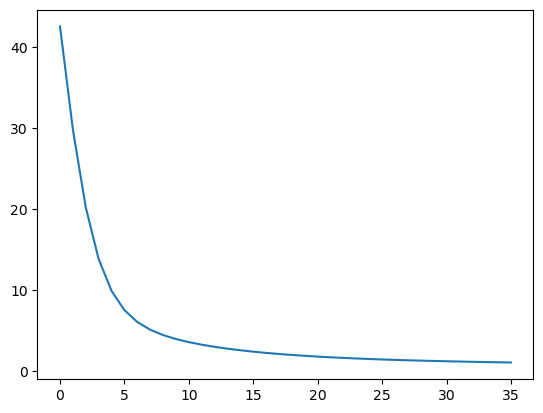

In [3]:
power =2
qubits_per_dim = 4
D= 1
a =1
lambdas = []
for i in range(D+1):
    lambdas.append(om.create_lambda_2(i, D, qubits_per_dim))
hamiltonian = 0
for i in range(D+1):
    hamiltonian += (a ** 2) * lambdas[i].power(power)

In [12]:
cr.create_distribution_scipy(8,1,hamiltonian,0.7)

KeyboardInterrupt: 

In [12]:
evolution_n_4 = np.load("/Users/salsa/MatrixModels/matrixmodels/remote/results/run_MORE_4.dipf_evolution.npy", allow_pickle=True).item()


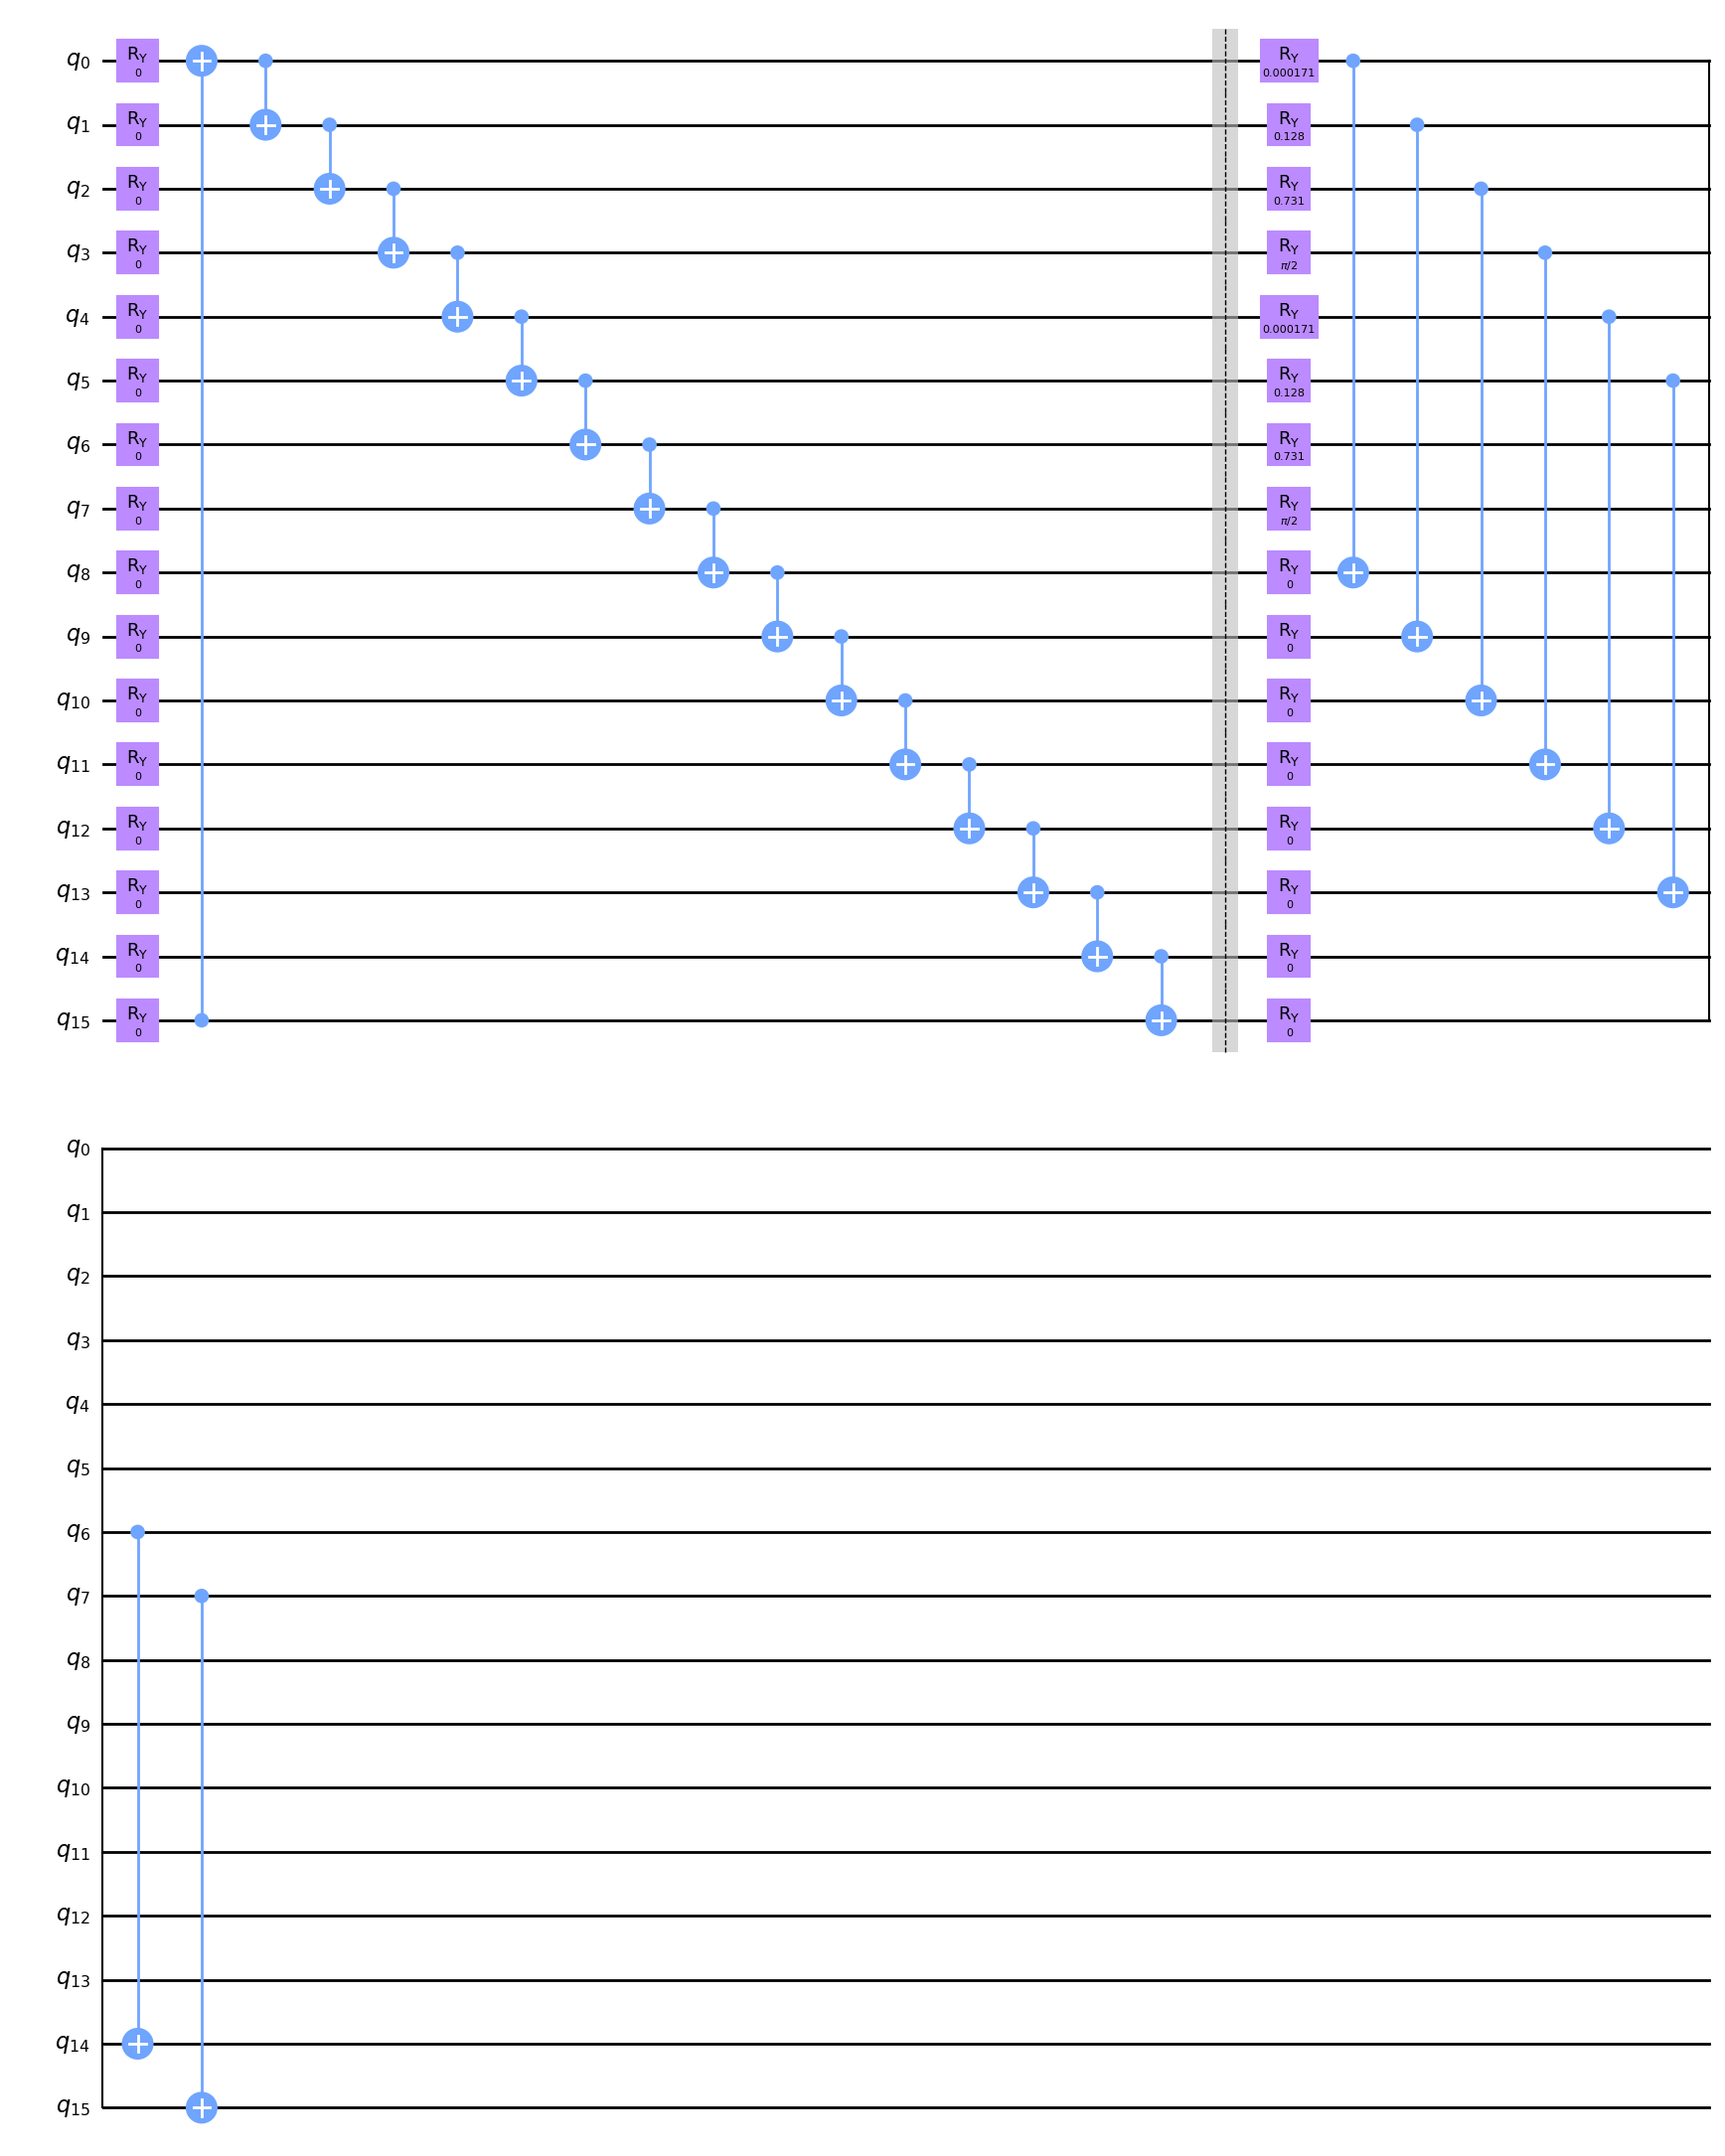

In [70]:
state = Statevector(evolution_n_4.evolved_state)

evolution_n_4.evolved_state.draw("mpl")

In [4]:

traced =partial_trace( state, list(range(8,16))) 
#vandermonde = om.vandermonde_2(1,4)
#state.expectation_value(vandermonde.power(6), range(0,8))

NameError: name 'state' is not defined

NameError: name 'traced' is not defined

(3.531221832169532+0j)

In [60]:

beta =np.arange(0.7, 1.4, 0.001)
result = (1/np.trace(np.exp(-beta* hamiltonian.to_matrix())) )* np.trace(np.exp(-beta * hamiltonian.to_matrix()) * om.vandermonde_2(1,4).power(4).to_matrix())

ValueError: operands could not be broadcast together with shapes (700,) (256,256) 

In [66]:
value =state.expectation_value(om.vandermonde_2(1,4).power(4), list(range(0,8)))

In [69]:
difference(value, 1, 0.9,hamiltonian )



3.531221832169532

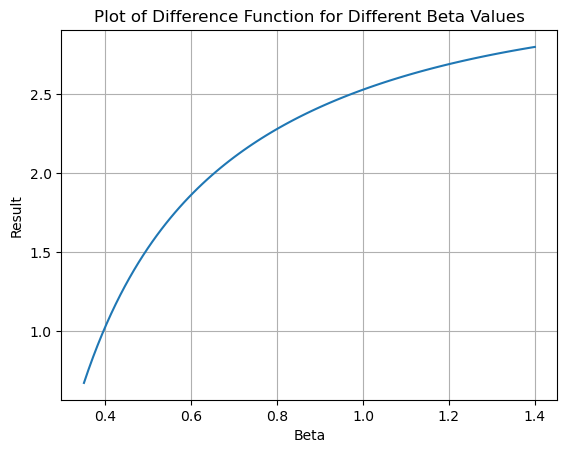

In [64]:
beta_values = np.linspace(0.35, 1.4, 100)

# Define other parameters, like value_, power_, and hamiltonian_

# Initialize an empty list to store the results for each beta
results = []

# Calculate the result for each beta value
for beta in beta_values:
    result = difference(value, 2, beta, hamiltonian)
    results.append(result)

# Plot the results
plt.plot(beta_values, results)
plt.xlabel('Beta')
plt.ylabel('Result')
plt.title('Plot of Difference Function for Different Beta Values')
plt.grid(True)
plt.show()



In [65]:
def objective_function(beta):
    return difference(value, 4, beta, hamiltonian)

initial_guess = 0.3
result = minimize(objective_function, initial_guess)
min_beta = result.x[0]
print("Minimum value of beta:", min_beta)
min_value = result.fun
print("Minimum value of the function:", min_value)

Minimum value of beta: 1.3099999999999998
Minimum value of the function: 1.7972609211394406
